## Image Classification

Bilder in zwei Kategorien aufteilen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [245]:
data = tf.keras.utils.image_dataset_from_directory("Data/Images")

Found 170 files belonging to 2 classes.


In [246]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Batch Datenset

Die Images werden in 32er Gruppen geladen und sind alle mit ihrer jeweiligen Gruppe anhand der Ordnerstruktur betitelt

In [247]:
iterator = data.as_numpy_iterator()

In [248]:
n = iterator.next()

4D-Array

Innerste Dimension: Ein Pixel (RGB)

Die Dimension darüber bildet aus Pixel-Arrays ein vollständiges Image

Die vollständigen Images sind selbst nochmal in Batches (32er Gruppen)

Das äußerste Array enthält zusätzlich die Labels zu jedem Image (0 oder 1)

In [249]:
n

(array([[[[1.62681458e+02, 4.96814575e+01, 4.36814575e+01],
          [1.57020264e+02, 4.19552612e+01, 3.69769287e+01],
          [1.56217102e+02, 3.68303833e+01, 3.29592896e+01],
          ...,
          [2.53377869e+02, 1.86858948e+02, 1.21805298e+02],
          [2.49275208e+02, 1.64569580e+02, 1.07906921e+02],
          [2.39800781e+02, 1.41503906e+02, 9.20781250e+01]],
 
         [[1.62694946e+02, 4.96949463e+01, 4.32261963e+01],
          [1.54808594e+02, 3.90415649e+01, 3.37851562e+01],
          [1.57257812e+02, 3.78408813e+01, 3.35010376e+01],
          ...,
          [2.50038574e+02, 1.79805237e+02, 1.17863831e+02],
          [2.48600159e+02, 1.61945618e+02, 1.07645935e+02],
          [2.38109741e+02, 1.40082031e+02, 9.09254150e+01]],
 
         [[1.64131165e+02, 5.11311646e+01, 4.31311646e+01],
          [1.54124207e+02, 3.85695190e+01, 3.15695190e+01],
          [1.56325500e+02, 3.56883545e+01, 3.02078857e+01],
          ...,
          [2.43295166e+02, 1.70244385e+02, 1.1187

In [250]:
n[0].shape  # 32 Images, 256 X-Pixel, 256 Y-Pixel, 3 Farben

(32, 256, 256, 3)

In [251]:
n[1]  # 32 Labels die zu den Images in dem vorherigen 4D-Array dazugehören

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [252]:
# enumerate(n[0][:4])  # enumerate: Funktion, welche ein Array durchgeht UND einen Index bereitstellt

# index = 0
# for img in n[0]:
#    ...
#    index += 1

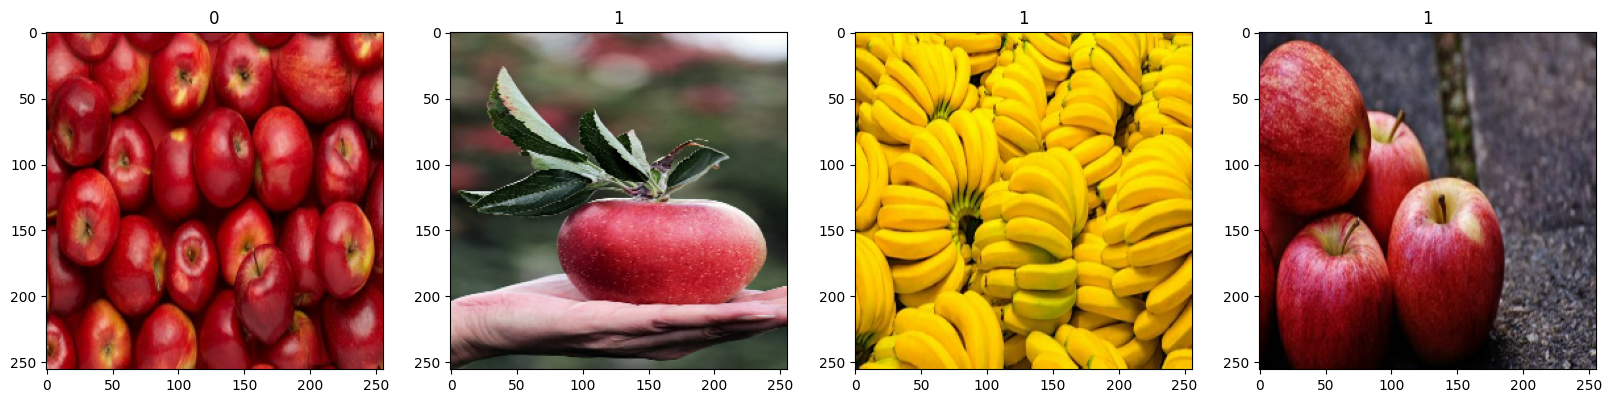

In [253]:
figure, axis = plt.subplots(ncols=4, figsize=(20, 5))
for index, img in enumerate(n[0][:4]):
    axis[index].imshow(img.astype(int))
    axis[index].title.set_text(n[1][index])

# index = 0
# figure, axis = plt.subplots(ncols=4, figsize=(20, 5))
# for img in n[0]:
#    axis[index].imshow(img.astype(int))
#    axis[index].title.set_text(n[1][index])
#    index += 1
#    if index >= 4:
#        break

In [254]:
n[1]

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

### Werte normalisieren

Wie bei M006 müssen jetzt die Daten herunterskaliert werden auf Werte zw. 0 und 1

Hier können wir einfach die Image Dimension durch 255 teilen

Da alle Pixel immer zw. 0 und 255 liegen, kommt hier ein Wert zwischen 0 und 1 heraus

In [160]:
data = data.map(lambda x, y: (x / 255, y))  # y bleibt unverändert, weil es sich um die Labels handelt

In [161]:
data.as_numpy_iterator().next()

(array([[[[9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01]],
 
         [[9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01]],
 
         [[9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.9607

## Model bauen

Ein Imageklassifizierungsmodell benötigt zusätzliche neue Layer:

- Conv2D (Convolution2D): Verwendet einen Scanner (2x2, 3x3, 4x4, ...) und scannt das Image (geht Reihenweise über das Image und gibt diese Reihen an den nächsten Layer weiter)
- MaxPooling2D: Verwendet die Daten aus dem vorherigen Schritt und fasst diese zusammen
- Flatten: Glättet einen 2D-Layer auf einen 1D-Layer

In [213]:
model = tf.keras.Sequential([
    tf.keras.Input((256, 256, 3)),  # n[0].shape
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),  # Fertig mit Imageverarbeitung
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [214]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 254, 254, 4)         │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 127, 127, 4)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 125, 125, 4)         │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 62, 62, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 60, 60, 4)           │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 30, 30, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         115,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,673 (451.85 KB)

 Trainable params: 115,673 (451.85 KB)

 Non-trainable params: 0 (0.00 B)

In [215]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy")

In [216]:
history = model.fit(data, epochs=100, verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.7359
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.7153
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6981
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6914
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6914
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6913
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6910
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.6913
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6917
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6865
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6878
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6877
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.6875
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6884
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6897
Epoch 16/100
6/6 ━━

In [217]:
import cv2

In [221]:
img = cv2.imread("Data/Images/apple.png")
resize = tf.image.resize(img, (256, 256))

In [222]:
resize / 255  # Image hat Pixel zwischen 0 und 255 -> 0 und 1

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.9670956 , 0.8965074 , 0.78278184],
        [0.94247854, 0.8718903 , 0.7581648 ],
        [0.9323836 , 0.86179537, 0.7480699 ],
        ...,
        [0.75249696, 0.6740656 , 0.5760263 ],
        [0.7564185 , 0.67798716, 0.5799479 ],
        [0.79519   , 0.7089154 , 0.6108762 ]],

       [[0.9617181 , 0.89112985, 0.77740437],
        [0.9363358 , 0.8657476 , 0.7520221 ],
        [0.9262408 , 0.8556526 , 0.7419271 ],
        ...,
        [0.7475151 , 0.667751  , 0.57370996],
        [0.7512388 , 0.67147475, 0.5774337 ],
        [0.78423715, 0.6966299 , 0.60258883]],

       [[0.9545303 , 0.88394207, 0.7702166 ],
        [0.9283208 , 0.8577326 , 0.7440071 ],
        [0.91662073, 0.8460325 , 0.73230696],
        ...,
        [0.7423713 , 0.6600184 , 0.5737439 ],
        [0.74410564, 0.6617527 , 0.5754782 ],
        [0.7720282 , 0.68183213, 0.5955576 ]],

       ...,

       [[0.336106  , 0.44808188, 0.5806912 ],
        [0.33

In [223]:
prediction = model.predict(np.expand_dims(resize / 255, 0))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.46882454]], dtype=float32)

In [224]:
if prediction < 0.5:
    print("Apfel")
else:
    print("Banane")

Apfel
